In [1]:
# Import libraries
import numpy as np
import pandas as pd
from scipy.stats import norm
import yfinance as yf

In [2]:
# Point 1.
# Download the joint DataFrame
tickers = ['BTC-USD', 'ETH-USD']
stocks = yf.Tickers(tickers)
hist_data = stocks.history(period='1y')['Close']
hist_data

[*********************100%%**********************]  2 of 2 completed


Ticker,BTC-USD,ETH-USD
Date,,
2023-05-27,26868.353516,1831.118286
2023-05-28,28085.646484,1910.914185
2023-05-29,27745.884766,1893.078125
2023-05-30,27702.349609,1901.026611
2023-05-31,27219.658203,1874.130493
...,...,...
2024-05-23,67929.562500,3776.927246
2024-05-24,68526.101562,3726.934570
2024-05-25,69265.945312,3749.236572


In [3]:
# Point 2.
# Portfolio
weights = np.array([0.4, 0.6])
initial_investment = 50000

In [4]:
# Point 3.
# Compute the return rates
return_rates = hist_data.pct_change()

In [5]:
return_rates

Ticker,BTC-USD,ETH-USD
Date,,
2023-05-27,NaN,NaN
2023-05-28,0.045306,0.043578
2023-05-29,-0.012097,-0.009334
2023-05-30,-0.001569,0.004199
2023-05-31,-0.017424,-0.014148
...,...,...
2024-05-23,-0.017256,0.010625
2024-05-24,0.008782,-0.013236
2024-05-25,0.010797,0.005984


In [6]:
# Delete the row with NaN
return_rates = return_rates.dropna()

In [7]:
# Point 4.
# Compute the linear regression
from scipy import stats

In [8]:
linear_regression = stats.linregress(
                        x=return_rates['BTC-USD'],
                        y=return_rates['ETH-USD'])

In [9]:
a = linear_regression.slope
b = linear_regression.intercept

In [10]:
print('y =', a, '* x +', b)

y = 0.8996662185091215 * x + -0.00014919446543048501


In [11]:
# Plot the regression line using Seaborn library
import seaborn as sn

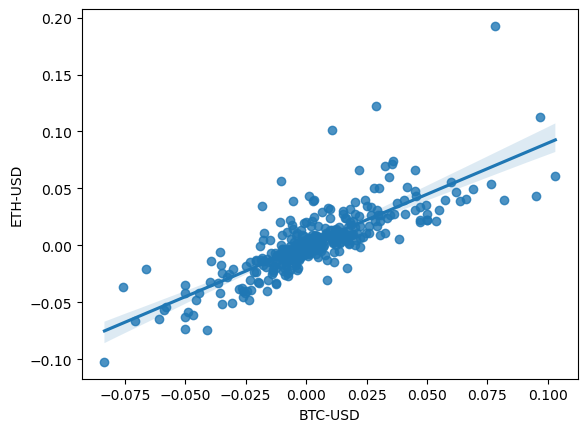

In [12]:
axes = sn.regplot(x=return_rates['BTC-USD'],
                  y=return_rates['ETH-USD'])

In [13]:
# Point 5.
# Compute the mean of return rates
mean_return_rates = return_rates.mean()
mean_return_rates

Ticker
BTC-USD    0.002950
ETH-USD    0.002505
dtype: float64

In [14]:
# Generate the variance-covariance matrix
cov_matrix = return_rates.cov()
cov_matrix

Ticker,BTC-USD,ETH-USD
Ticker,,
BTC-USD,0.000642,0.000577
ETH-USD,0.000577,0.000817


In [15]:
# Point 6.
# Compute the mean of portfolio r.r.
mean_port = mean_return_rates.dot(weights)
mean_port

0.0026833583536949052

In [16]:
# Compute the standard deviation of portfolio r.r.
std_port = np.sqrt(weights.T.dot(cov_matrix).dot(weights))
std_port

0.025956953879608634

In [17]:
# Point 7.
# Compute the z-value
alpha = 0.95
z_value = norm.ppf(1 - alpha)
z_value

-1.6448536269514722

In [18]:
# Compute the (1 - alpha)th quantile
quantile = mean_port + std_port * z_value
quantile

-0.040012031379791445

In [19]:
# Compute the (absolute) VaR of the portfolio for a 1 day horizon
VaR_port = - initial_investment * quantile

In [20]:
# Compute the (absolute) VaR of the portfolio for a 5 days horizon
VaR_5 = np.sqrt(5) * VaR_port
print('The VaR on a 5 days horizon is:', VaR_5)

The VaR on a 5 days horizon is: 4473.481104153419
